In [15]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd


In [16]:
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 25,
                     'axes.labelsize': 22,
                     'axes.labelpad': 6,
                     'lines.linewidth': 1,
                     'lines.markersize': 4,
                     'xtick.labelsize' : 20,
                     'ytick.labelsize' : 20,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'legend.framealpha' : 1.0,
                     'legend.fontsize' : 17,
                     'xtick.major.pad': 10,
                     'xtick.major.size' : 8,
                     'xtick.minor.size' : 5,
                     'ytick.major.size' : 8,
                     'ytick.minor.size' : 5,
                     'legend.labelspacing': 0.3,
                     
                    }) 
from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

plt.rcParams.update({'font.size': 22})

def get_colors(n):
    return plt.cm.plasma(np.linspace(0,0.8,n));

sFormatter1 = matplotlib.ticker.ScalarFormatter(useOffset=False, useMathText=True)
sFormatter1.set_powerlimits((-3, 3))

sFormatter2 = matplotlib.ticker.ScalarFormatter(useOffset=False, useMathText=True)
sFormatter2.set_powerlimits((-3, 3))

In [17]:
def to_float_array(stringdata):
    comma_pos = []
    counter = 0
    
    for i in range(0, len(stringdata)):
        if stringdata[i] == ',':
            comma_pos.append(i)
        counter = counter + 1
    return np.array([float(stringdata[1:comma_pos[0]]), float(stringdata[comma_pos[0]+1:comma_pos[1]]), float(stringdata[comma_pos[1]+1:-1])])

In [22]:
number_of_bins = 30

In [23]:
def produce_histogram(name, number_of_bins):
    
    max_steps = 100000
    #pos_data = pd.read_csv('D:\\Nextcloud\\Studium\\Master_Physik\\AION\MOT_calculation\\output\\raw_trajectories\\pos'+name+ '.txt', sep=" ", header=None)
    vel_data = pd.read_csv('D:\\AION_Git\\AtomECS\\output\\vel_'+name+ '.txt', sep=" ", header=None)
    total_N = int(vel_data.iloc[0,1])
    N=len(vel_data.set_index(0).loc["step-"+str(max_steps)+",":,1])-1
    list_of_survivors =  np.array(vel_data.iloc[vel_data.shape[0]-N:vel_data.shape[0],0])
    list_of_starters = np.array(vel_data.iloc[1:total_N+1,0])
    
    
    #pos_df = pos_data.set_index(0)
    vel_df = vel_data.set_index(0)

    #pos_survivor_array =  np.array(pos_df.loc[list_of_survivors,1])
    vel_survivor_array =  np.array(vel_df.loc[list_of_survivors,1])

    #pos_starters_array =  np.array(pos_data.iloc[1:int(pos_data.iloc[0,1])+1,1])
    vel_starters_array =  np.array(vel_data.iloc[1:int(vel_data.iloc[0,1])+1,1])
    
    

    vel_data = np.array([to_float_array(i) for i in vel_starters_array]).transpose()
    speed_list = [np.sqrt(vel_data[0][i]**2+vel_data[1][i]**2+ vel_data[2][i]**2) for i in np.arange(0,total_N)]

    norm_list, bins_list = np.histogram(speed_list, bins=number_of_bins)

    vel_data = np.array([to_float_array(vel_survivor_array[int(max_steps/100)*i]) for i in np.arange(0,N)]).transpose()
    speed_list = [np.sqrt(vel_data[0][i]**2+vel_data[1][i]**2+ vel_data[2][i]**2) for i in np.arange(0,N)]

    density_values , _ = np.histogram(speed_list, bins=bins_list)
    
    return density_values / norm_list, bins_list

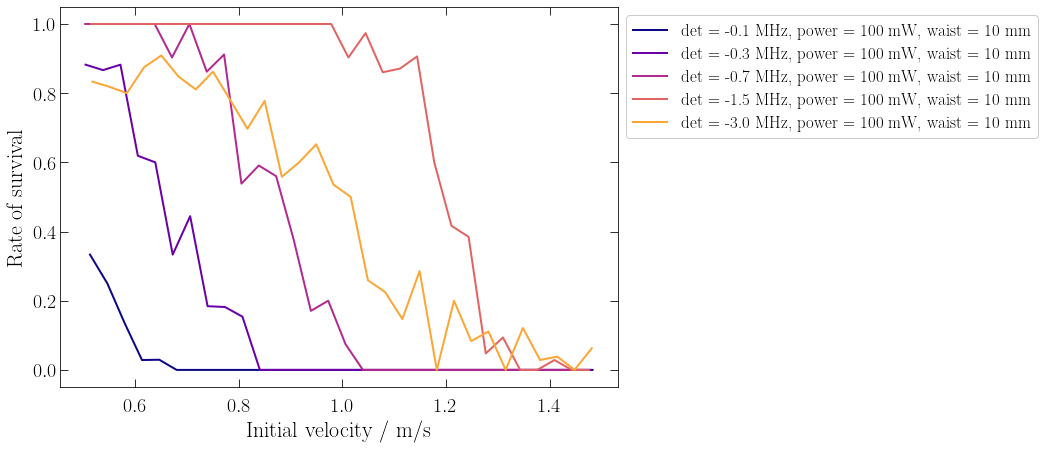

In [24]:
plt.figure(figsize=(10,7))


power_vals = [100, 200,500,1000]
det_vals = [-0.1, -0.3, -0.7, -1.5, -3.0]
labels = [ 30, 90, 150]
colors = get_colors(5)
for i in range(5):
    density_values, bins_list = produce_histogram("detuning_"+ str(i), number_of_bins)
    plt.plot(bins_list[0:-1]+np.ones(number_of_bins)*(bins_list[1]-bins_list[0])/2, density_values , label="det = "+str(det_vals[i])+" MHz, power = 100 mW, waist = 10 mm", color = colors[i], lw=2)


plt.xlabel("Initial velocity / m/s")
plt.ylabel("Rate of survival")


#plt.grid(True)

title="Capture atoms red Sr MOT"
plt.legend(bbox_to_anchor=(1, 1),loc=2)

plt.savefig('D:\\AION_Git\\AtomECS\\output\\detuning_capture.pdf', bbox_inches='tight')